<h1>Comprehensive Analysis of Machine Learning Techniques</h1>

<h2>Importing libraries</h2>

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

<h2>Importing dataset</h2>

<p>The dataset I am using is California Housing Prices, 
which is a popular dataset for testing regression models and is supported by sci-kit learn,
giving it a lot of customization options.</p>

In [6]:
from sklearn.datasets import fetch_california_housing 
cal_housing_dataset = fetch_california_housing(as_frame = True)

<h4>Print all dataset keys</h4>

<p>Keys gives the names used for function calls( like data refering to features and target refering to the label)</p>

In [7]:
print(cal_housing_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


<h4>Dataset description</h4>

In [8]:
print(cal_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<h4>Features and Label names</h4>

In [6]:
print(cal_housing_dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
print(cal_housing_dataset.target_names)

['MedHouseVal']


<h4>Dataset Structure, once for features then for the label, then both combined</h4>

<p>Shows the structure of the dataset like a spreadsheet would.</p>

In [9]:
#              Features
print(cal_housing_dataset.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [9]:
#              Label
print(cal_housing_dataset.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [28]:
#        All the dataset
print(cal_housing_dataset.frame)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

<h4>Dataset Info</h4>

<p>Shows information about the datatype of all the columns, and if there are any null values.</p>

In [11]:
dataset = cal_housing_dataset.frame
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


<h4>List of featues excluding longitude and latitude</h4>

<p>Longitude and latitude are special features as they are both negative float datatypes, and unlike the other features they represent the physical location of the houses, meaning that they are better analyzed separately.</p>

In [12]:
#                                   main statistics values for the data

features_for_EDA = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]
# .describe() shows the general statistics of the selected features
print(dataset[features_for_EDA].describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup   MedHouseVal  
count  20640.000000  20640.000000  
mean       3.070655      2.068558  
std       10.386050      1.153956  
min        0.692308      0.149990  
25%        2.429741      1.196000  
50%        2.818116      1.797000  
75%        3.282261      2.647250  


<h4>Median House Value Distribution Graph</h4>

<p>The graph shows the distribution of median house values based on their count. We can see that the distribution is far from normal, it is skewed to the right. This is an indicator that linear regression models are not going to work well with our dataset.</p>

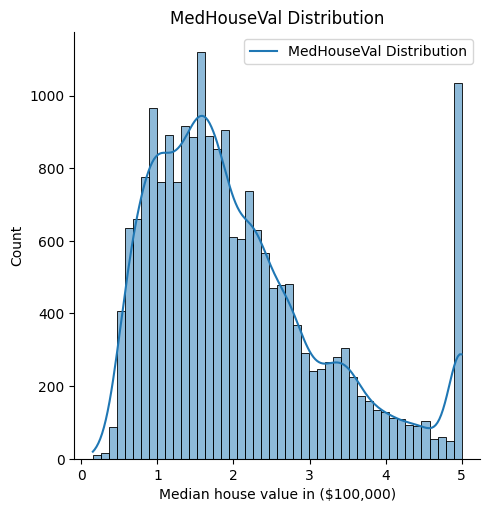

In [13]:
sns.displot(dataset['MedHouseVal'], kde = True) 
plt.title('MedHouseVal Distribution') 
plt.xlabel("Median house value in ($100,000)") 
plt.legend(['MedHouseVal Distribution'], loc = 'best') 
plt.show()

<p>Fom the graph we can see that the median house price is around $150000, however there is also a lot of data descrepency around the $500000 range.</p>

<h4>Plot to see distribution of all feature values,except latitude and longitude, through all the houses</h4>

<p>Like above, we will see the distributions of the features based on their count</p>

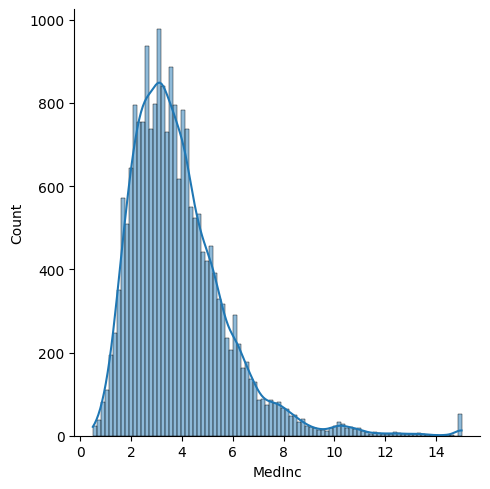

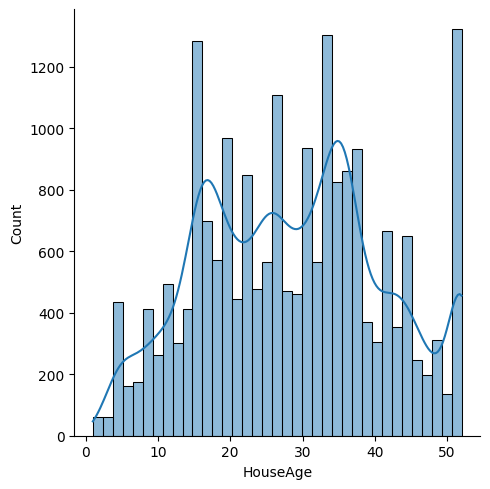

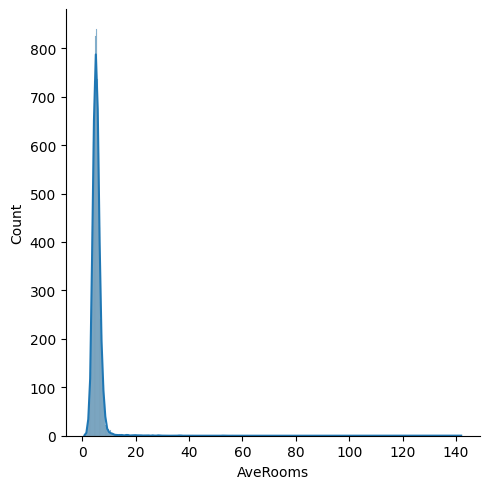

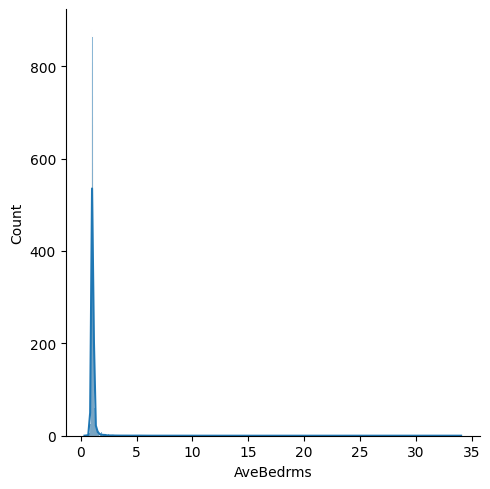

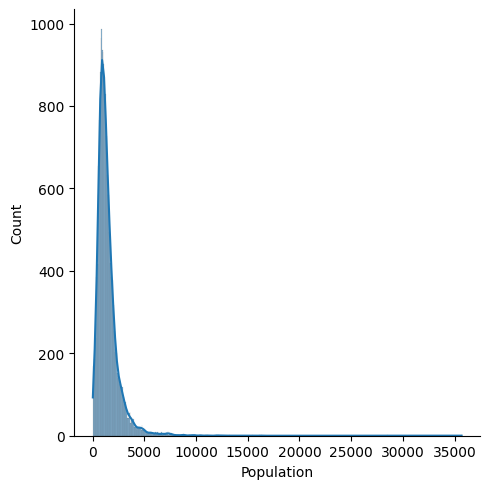

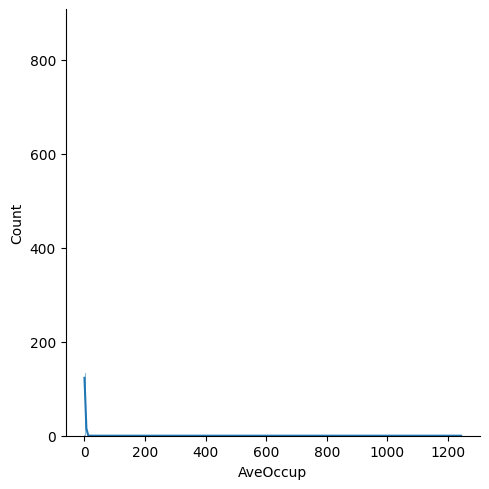

In [35]:
for feature in features_for_EDA[:-1]: 
  sns.displot(dataset[feature], kde = True)

<p>The data is clearly very skewed, except average house age. This can be due to a high dependency on outliers. In such cases problems can arise since the models will lack good data to learn about patterns and trends.</p>

<h4>Coorelation between features</h4>

In [33]:
print(dataset[features_for_EDA].corr())

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


<p>Correlations can be considered as relationships betwen the columns. From our data we can see that the highest coorelation with the label is achived by the fetuare: "Median Income" at 0.688075. </p>

<h4>Coorelation between Median house value and Median income</h4>

Text(0, 0.5, 'MedHouseVal')

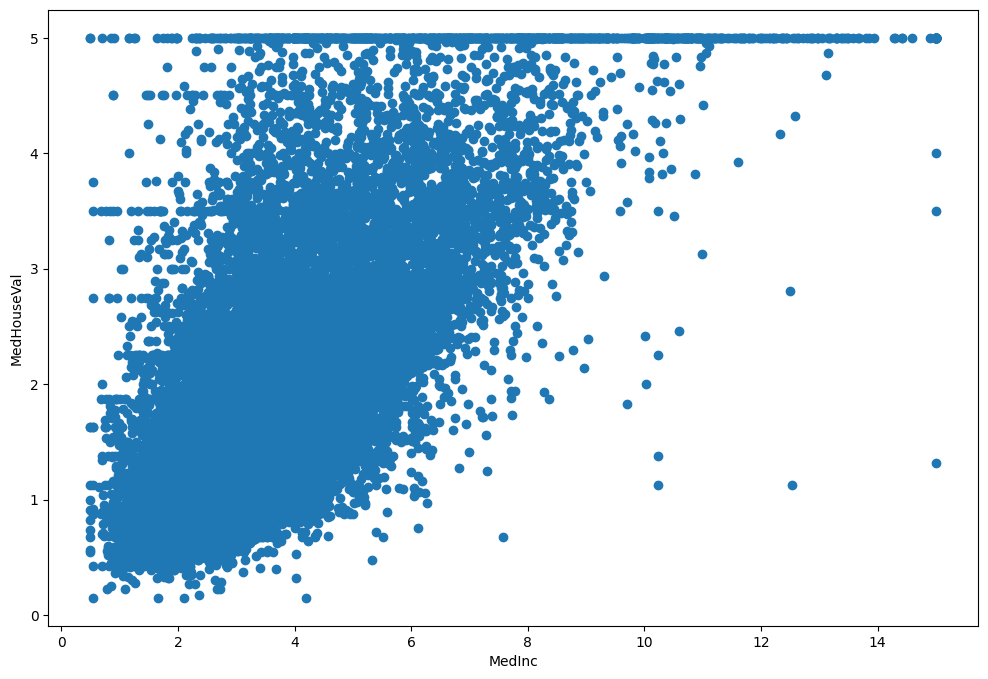

In [37]:
plt.figure(figsize=(12, 8)) 
plt.scatter(data = dataset, x = "MedInc", y = "MedHouseVal") 
plt.xlabel("MedInc") 
plt.ylabel("MedHouseVal")


<p>We can see that the increase in median income increases the median price of the house, or better put, with the increase of the income 
the price increases too.</p>

<h4>Plot map of house location based on longitude and latitude</h4>

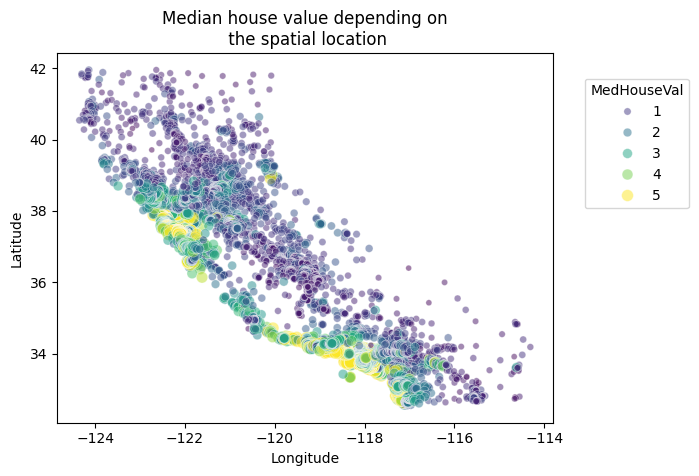

In [38]:
sns.scatterplot(data = dataset, x = "Longitude", y = "Latitude", size = "MedHouseVal", hue = "MedHouseVal", palette = "viridis", alpha=0.5) 
plt.legend(title = "MedHouseVal", bbox_to_anchor = (1.05, 0.95), loc = "upper left") 
plt.title("Median house value depending on\n the spatial location")
plt.show()

<p>This graph helps us too, as it shows that houses woth similar prices are for the most part clustered together too.</p>

<h2>Data preprocessing</h2>

<p>After getting a good idea about the data we are working with the next step is to continue with data preprocessing including:</p>
<ol>
  <li>Checking for missing values</li>
  <li>Checking for categorical data</li>
  <li>Splitting the dataset in training and testing sets (80/20 split)</li>
  <li>Standarizing the dataset</li>
  <li>Feature scaling</li>
</ol>

<h4>Check number of missing values</h4>

In [39]:
print(dataset.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


<p>No missing data</p>

<h4>Check for categorical data<h4>

In [40]:
print(dataset.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


<p>No categorical data found</p>

<h4>Split dataset into training and test sets</h4>

In [43]:
y_target = dataset['MedHouseVal'] 
X_features = dataset.drop(['MedHouseVal'], axis = 1)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 1)
print(X_train,"\n\n",X_test,"\n\n",y_train,"\n\n",y_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
15961  3.1908      52.0  5.000000   1.014184       879.0  3.117021     37.71   
1771   3.6094      42.0  4.900990   0.957096       971.0  3.204620     37.95   
16414  2.6250      16.0  8.333333   1.666667        20.0  3.333333     37.90   
5056   1.5143      34.0  3.805981   1.149526      3538.0  2.580598     34.02   
8589   7.3356      38.0  5.894904   1.057325       750.0  2.388535     33.89   
...       ...       ...       ...        ...         ...       ...       ...   
10955  1.7823      17.0  4.055046   1.087156      1079.0  2.474771     33.76   
17289  8.5608      42.0  6.788462   1.011538       753.0  2.896154     34.42   
5192   1.1326      42.0  4.890785   1.006826       775.0  2.645051     33.93   
12172  2.6322      10.0  4.991614   0.951782      1323.0  2.773585     33.73   
235    2.3036      35.0  4.620513   1.176923      1009.0  2.587179     37.79   

       Longitude  
15961    -122.43  
1

<h4>Standarize dataset</h4>

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

<h4>Feature scaling</h4>

<p>I will only be scaling the features</p>

In [46]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
print(X_train, "\n\n", X_test)

[[-0.36232605  1.85890297 -0.16877334 ...  0.00190139  0.97229046
  -1.42250942]
 [-0.14102329  1.06434823 -0.20665523 ...  0.00945496  1.08459626
  -1.38265919]
 [-0.66144956 -1.0014941   1.10658361 ...  0.02055372  1.06119922
  -0.8297373 ]
 ...
 [-1.45044201  1.06434823 -0.21055978 ... -0.03879603 -0.79652586
   0.65468363]
 [-0.65764311 -1.47822694 -0.17198179 ... -0.02771272 -0.89011402
   1.20262424]
 [-0.83136525  0.50815991 -0.31396782 ... -0.04378624  1.00972573
  -1.30794002]] 

 [[-0.33102858  0.82598181 -0.35885058 ... -0.11362606 -0.73569355
   0.60487084]
 [-1.0032899   0.66707086 -0.173141   ... -0.04185389  0.53710549
  -0.10247067]
 [ 0.0724551   1.38217013 -0.36761594 ...  0.05892484  0.98164928
  -1.41752814]
 ...
 [ 0.61952652 -0.20693936 -0.16877334 ...  0.04929666  0.92081697
  -1.39262175]
 [ 0.52806599  1.06434823 -0.03563168 ... -0.00503065 -0.72165533
   0.73438408]
 [-0.61894421  1.85890297  0.11482041 ... -0.01755593 -0.76844941
   1.09303611]]


<h2> Evaluating the Models using R^2</h2>

<h4>Calculating R^2</h4>

I will be using cross validation for the calculations

In [48]:
from sklearn.model_selection import cross_val_score 

def calculate_eval_metric(model, X, y, cv = 3): 
    scores = cross_val_score(model, X, y, cv = cv, scoring = 'r2') 
    print("Evaluation score on 3 cross-validation sets : ", scores) 
    print("Average R squared score : ", scores.mean()) 
    return scores.mean()

#Dictionary to store Cross - Evaluation Metrics for each Model
#DICTIONARY TO STORE CV SCORES
cv_scores = {}

<h2>Regression models</h2>

<h4>Multiple Linear Regression</h4>

In [49]:
from sklearn.linear_model import LinearRegression 

#CREATING A MODEL OBJECT AND TRAINING 
linear_regression_model = LinearRegression() 
cv_scores['linear_regression_model'] = calculate_eval_metric(linear_regression_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.61733889 0.60654907 0.5905632 ]
Average R squared score :  0.6048170562554777


<h4>Polynomial Regression</h4>

In [50]:
from sklearn.preprocessing import PolynomialFeatures 

#specify degree of 3 for polynomial regression model 
#include bias=False means don't force y-intercept to equal zero 
poly = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = True) 

#CREATE POLYNOMIAL FEATURES FOR ALL FEATURES EXCEPT THE COORDINATES 
X_train_temp = X_train[:, :-2] 
poly_X_train = poly.fit_transform(X_train_temp) 

#CONCAT THE COORDINATE FEATURES 
poly_X_train = np.concatenate((poly_X_train, X_train[:, -2:]), axis = 1) 

# Print the shapes to verify
X_train.shape  # Output: (16512, 8)
poly_X_train.shape

#CREATING A MODEL OBJECT AND TRAINING 
polynomial_regression_model = LinearRegression() 
cv_scores['polynomial_regression_model'] = calculate_eval_metric(polynomial_regression_model, poly_X_train, y_train)

X_train shape: (16512, 8)
poly_X_train shape: (16512, 43)
Evaluation score on 3 cross-validation sets :  [   0.51319899 -100.3940004    -4.14467619]
Average R squared score :  -34.67515920016359


<p>Polynomial regression is not compatable with the dataset at all, it yields a negative value for R^2, so I will need to optimize it</p>

<h4>Optimizing polynomial regression</h4>

In [51]:
from sklearn.linear_model import Ridge 
poly_ridge_regression_model = Ridge(alpha = 2500.0) 
cv_scores['poly_ridge_regression_model'] = calculate_eval_metric(poly_ridge_regression_model, poly_X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.54003682 0.40483983 0.53270562]
Average R squared score :  0.49252742464509264


<p>Ridge is is version of the polynomial regression that helps with overfitting. Still, even after using Ridge it remains as the worse option.</p>

<h4>Decision Trees</h4>

In [52]:
from sklearn.tree import DecisionTreeRegressor 
decision_tree_model = DecisionTreeRegressor(random_state = 0) 
cv_scores["decision_tree_model"] = calculate_eval_metric(decision_tree_model, X_train, y_train) 

#PARAMETER TUNING #TRYING DIFFERENT VALUES OF MAX_DEPTH 
for depth in [2, 4, 6, 8, 10, 12]: 
  decision_tree_model_depth = DecisionTreeRegressor(random_state = 0, max_depth = depth) 
  cv_scores["decision_tree_model_depth", depth] = calculate_eval_metric(decision_tree_model_depth, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.6292367  0.55985191 0.59136255]
Average R squared score :  0.593483722209434
Evaluation score on 3 cross-validation sets :  [0.44816492 0.42954666 0.44545706]
Average R squared score :  0.44105621127826095
Evaluation score on 3 cross-validation sets :  [0.57585727 0.55652765 0.57489747]
Average R squared score :  0.5690941288023251
Evaluation score on 3 cross-validation sets :  [0.65708645 0.62742877 0.6540113 ]
Average R squared score :  0.6461755081549374
Evaluation score on 3 cross-validation sets :  [0.69626366 0.66989515 0.67986131]
Average R squared score :  0.6820067052741757
Evaluation score on 3 cross-validation sets :  [0.68647535 0.66354374 0.68700382]
Average R squared score :  0.6790076358165317
Evaluation score on 3 cross-validation sets :  [0.6864275  0.63599426 0.6615508 ]
Average R squared score :  0.6613241838056646


I used decision trees in 6 different depths. It turns out that the best depth is 8 and going any further actually makes the model perform worse.

<h4>Random Forest</h4>

In [53]:
from sklearn.ensemble import RandomForestRegressor 
random_forest_regressor_model = RandomForestRegressor(n_estimators = 100, max_depth = 8, random_state = 0) 
cv_scores["random_forest_regressor_model"] = calculate_eval_metric(random_forest_regressor_model, X_train, y_train)

#TRYING DIFFERENT VALUES FOR N_ESTIMATORS IN TRAINING OUR MODEL 
for estimators in [80, 100, 120]: 
  random_forest_regressor_model_estimators = RandomForestRegressor(n_estimators = estimators, max_depth = 8, random_state = 0) 
  cv_scores["random_forest_regressor_model_estimators", estimators] = calculate_eval_metric(random_forest_regressor_model_estimators, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.76016949 0.74570265 0.74784899]
Average R squared score :  0.7512403760277339
Evaluation score on 3 cross-validation sets :  [0.75947895 0.74446192 0.74758585]
Average R squared score :  0.7505089047699585
Evaluation score on 3 cross-validation sets :  [0.76016949 0.74570265 0.74784899]
Average R squared score :  0.7512403760277339
Evaluation score on 3 cross-validation sets :  [0.76075865 0.74723118 0.74797555]
Average R squared score :  0.75198845961228


Random forest yields the best overall value for R^2, thus being the bset model to use for this dataset

<h4>End</h4>